Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
df<-airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
df

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.7079955
Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.7050064
Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.7068231
Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.6973054
Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.7011554
Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.7050954
Madrid,Entire home/apt,,2,1.0,1,1,70,NA,1,0,100,40.40898,-3.6982515
Madrid,Private room,La Latina,2,1.5,1,1,30,NA,1,0,80,40.40836,-3.7040433
Madrid,Entire home/apt,Embajadores,4,1.0,1,2,57,NA,2,8,98,40.41162,-3.7032811


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
df_madrid<-df[df$City == "Madrid" & df['Room.Type'] == "Entire home/apt" & df['Neighbourhood'] != '', !names(df) %in% c('City', 'Room.Type')]

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
total = nrow(df_madrid)
bad = nrow(df_madrid[is.na(df_madrid$Square.Meters),])
good = nrow(df_madrid[!is.na(df_madrid$Square.Meters),])
paste('Porcentaje de apartamentos que NO muestran los metros cuadrados: ', bad / total)
paste('Porcentaje de apartamentos que SI muestran los metros cuadrados: ', good / total)

[1] "Porcentaje de apartamentos que NO muestran los metros cuadrados:  0.938046777361185"

[1] "Porcentaje de apartamentos que SI muestran los metros cuadrados:  0.0619532226388145"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
good_eq_0 = nrow(df_madrid[!is.na(df_madrid$Square.Meters) & df_madrid$Square.Meters == 0,])
paste('Porcentaje total de apartamentos con metros cuadrados NO NA y son 0: ', good_eq_0 / total)


[1] "Porcentaje total de apartamentos con metros cuadrados NO NA y son 0:  0.0228530619532226"

Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0]<- NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

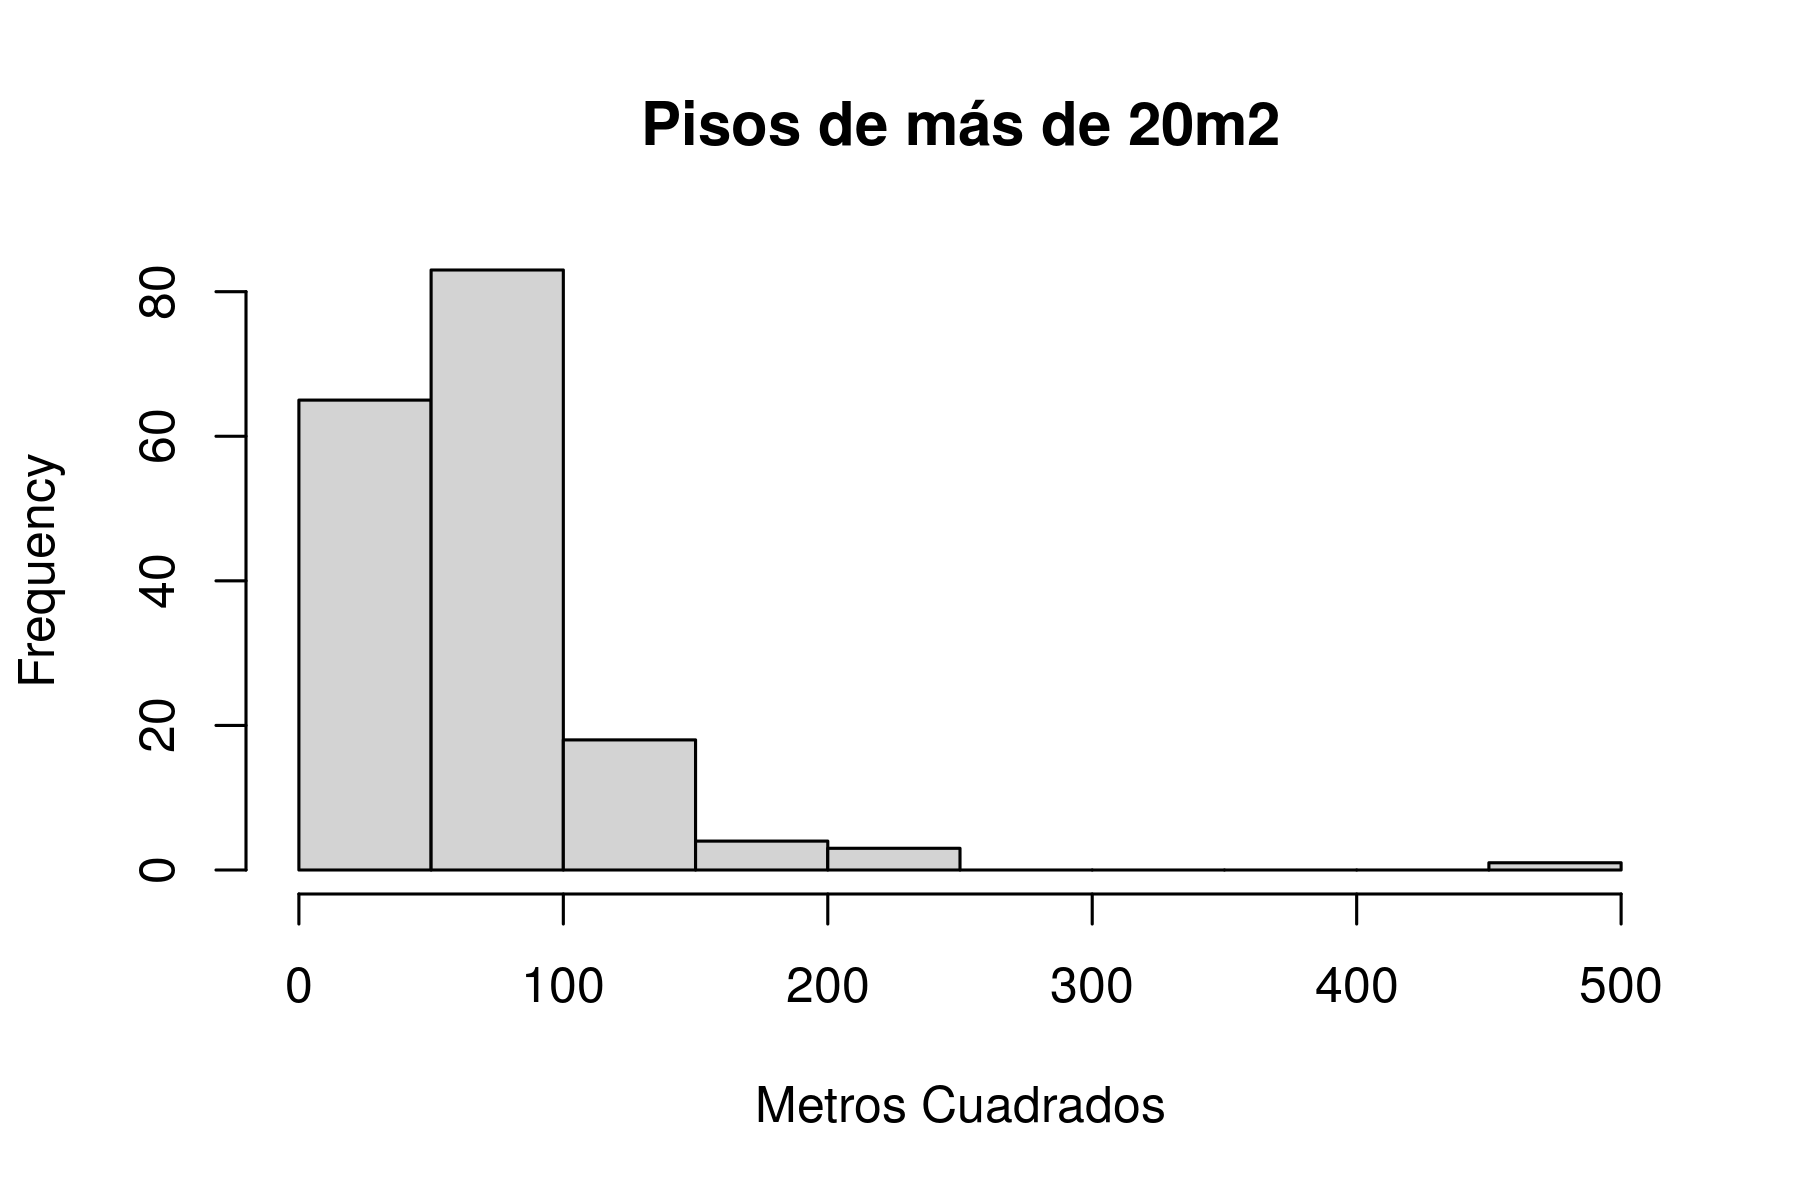

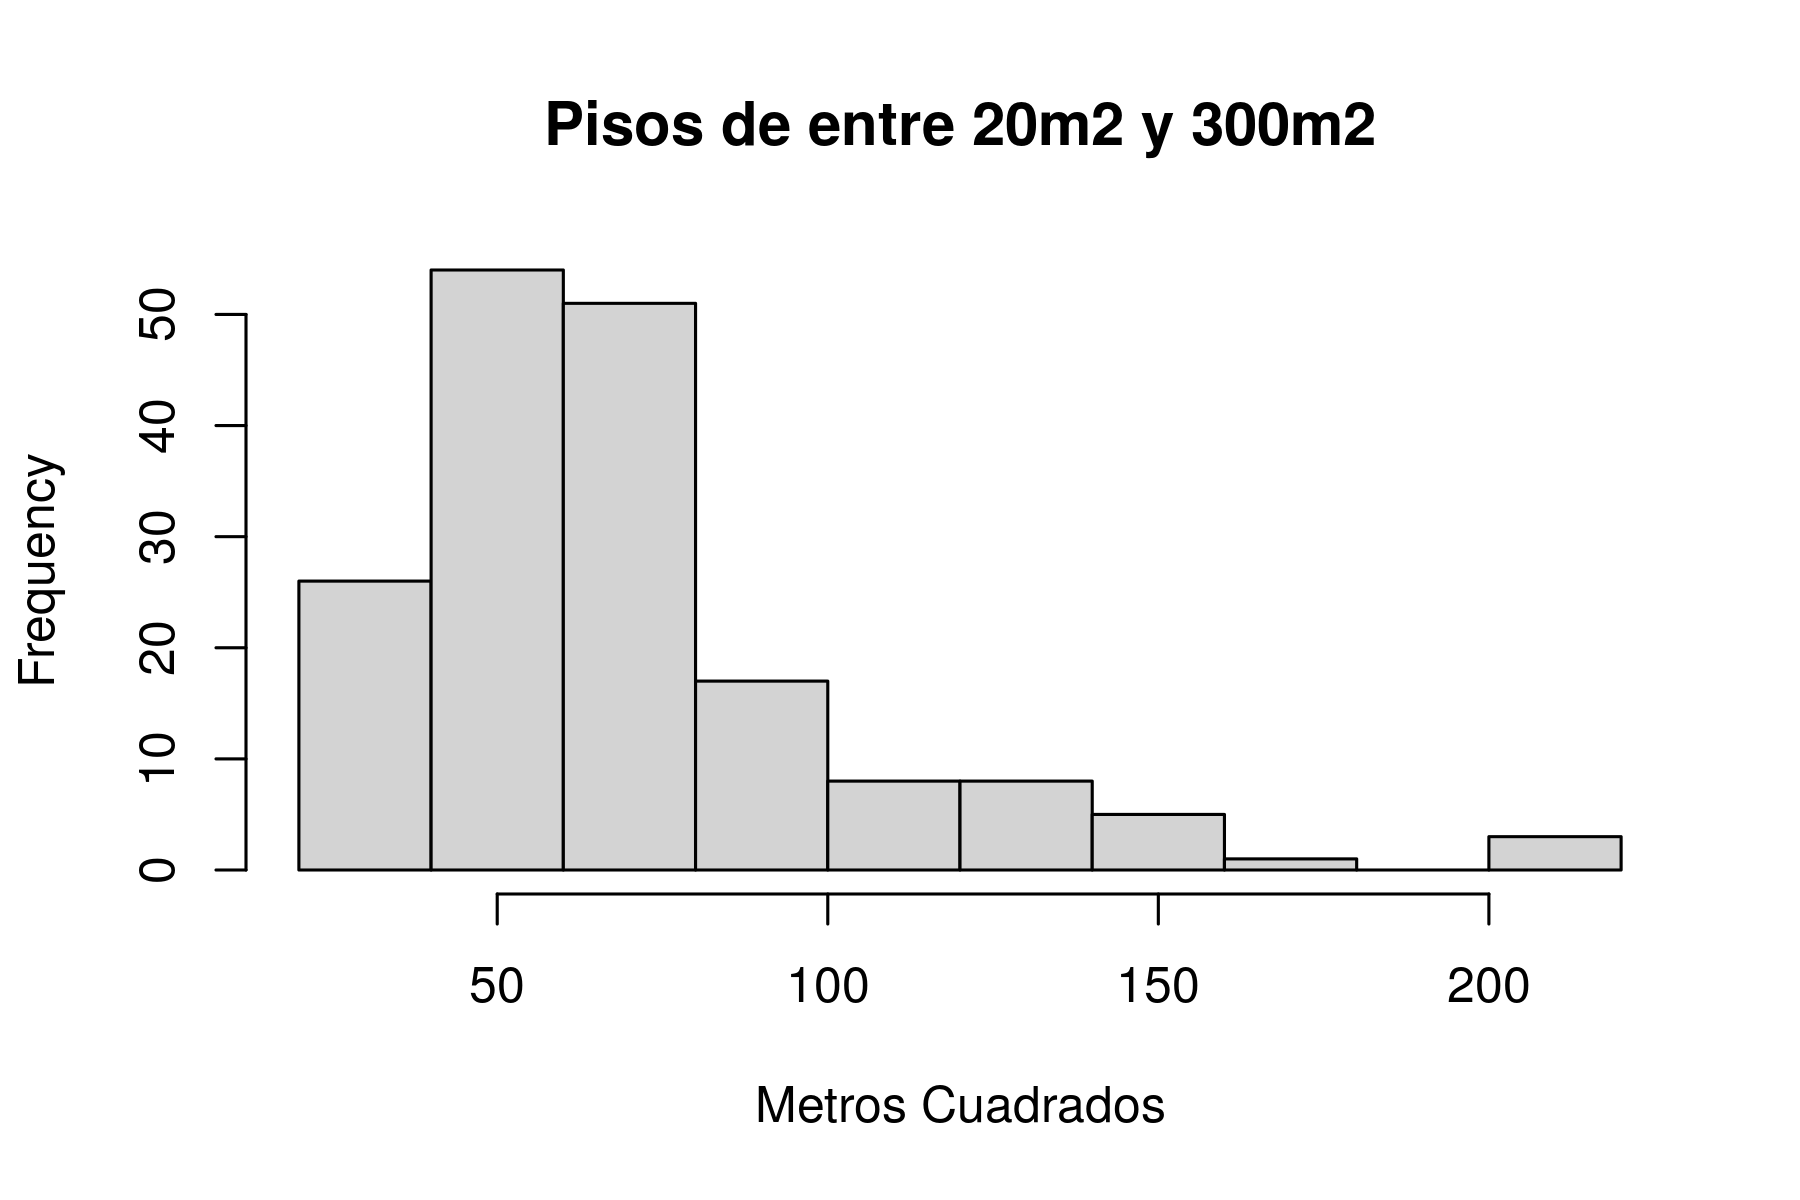

In [8]:
df_madrid$Square.Meters[df_madrid$Square.Meters <= 20]<- NA
hist(df_madrid$Square.Meters, main='Pisos de más de 20m2', xlab='Metros Cuadrados')

# Sería interesante eliminar asignar NA los apartamentos de mas de 300m2. Posiblemente sean locales comerciuales o similares.
df_madrid$Square.Meters[df_madrid$Square.Meters >= 300] <- NA
hist(df_madrid$Square.Meters, main='Pisos de entre 20m2 y 300m2', xlab='Metros Cuadrados')

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [9]:
library(dplyr)
df_Neighbourhood_count <- df_madrid %>% count(Neighbourhood)
df_Neighbourhood_na_count <- df_madrid[is.na(df_madrid$Square.Meters), ] %>% count(Neighbourhood)
df_Neighbourhood_summary <-merge(df_Neighbourhood_count,df_Neighbourhood_na_count, by="Neighbourhood")
neighbourhood_to_delete <- df_Neighbourhood_summary[df_Neighbourhood_summary$n.x == df_Neighbourhood_summary$n.y, 'Neighbourhood']
neighbourhood_to_delete

df_madrid_clean_neighbourhood <- df_madrid[!df_madrid$Neighbourhood %in% neighbourhood_to_delete, ]
df_madrid_clean_neighbourhood



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Aluche"              "Arganzuela"          "Atocha"             
 [4] "Bellas Vistas"       "Berruguete"          "Castillejos"        
 [7] "Delicias"            "Estrella"            "Fuencarral-el Pardo"
[10] "Fuencarral-El Pardo" "Gaztambide"          "Guindalera"         
[13] "Hispanoamérica"      "Hortaleza"           "Ibiza"              
[16] "Imperial"            "La Chopera"          "Legazpi"            
[19] "Moncloa"             "Nueva España"        "Prosperidad"        
[22] "Puente de Vallecas"  "Tetuán"              "Valdeacederas"      
[25] "Vallehermosa"        "Villa de Vallecas"   "Villaverde"

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA
21,La Latina,2,1,1,1,89,NA,1,10,98,40.41007,-3.710624,NA
22,Palacio,5,3,3,3,192,NA,2,12,80,40.42017,-3.712629,NA
23,La Latina,4,1,1,1,100,NA,2,12,NA,40.40990,-3.710948,NA


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

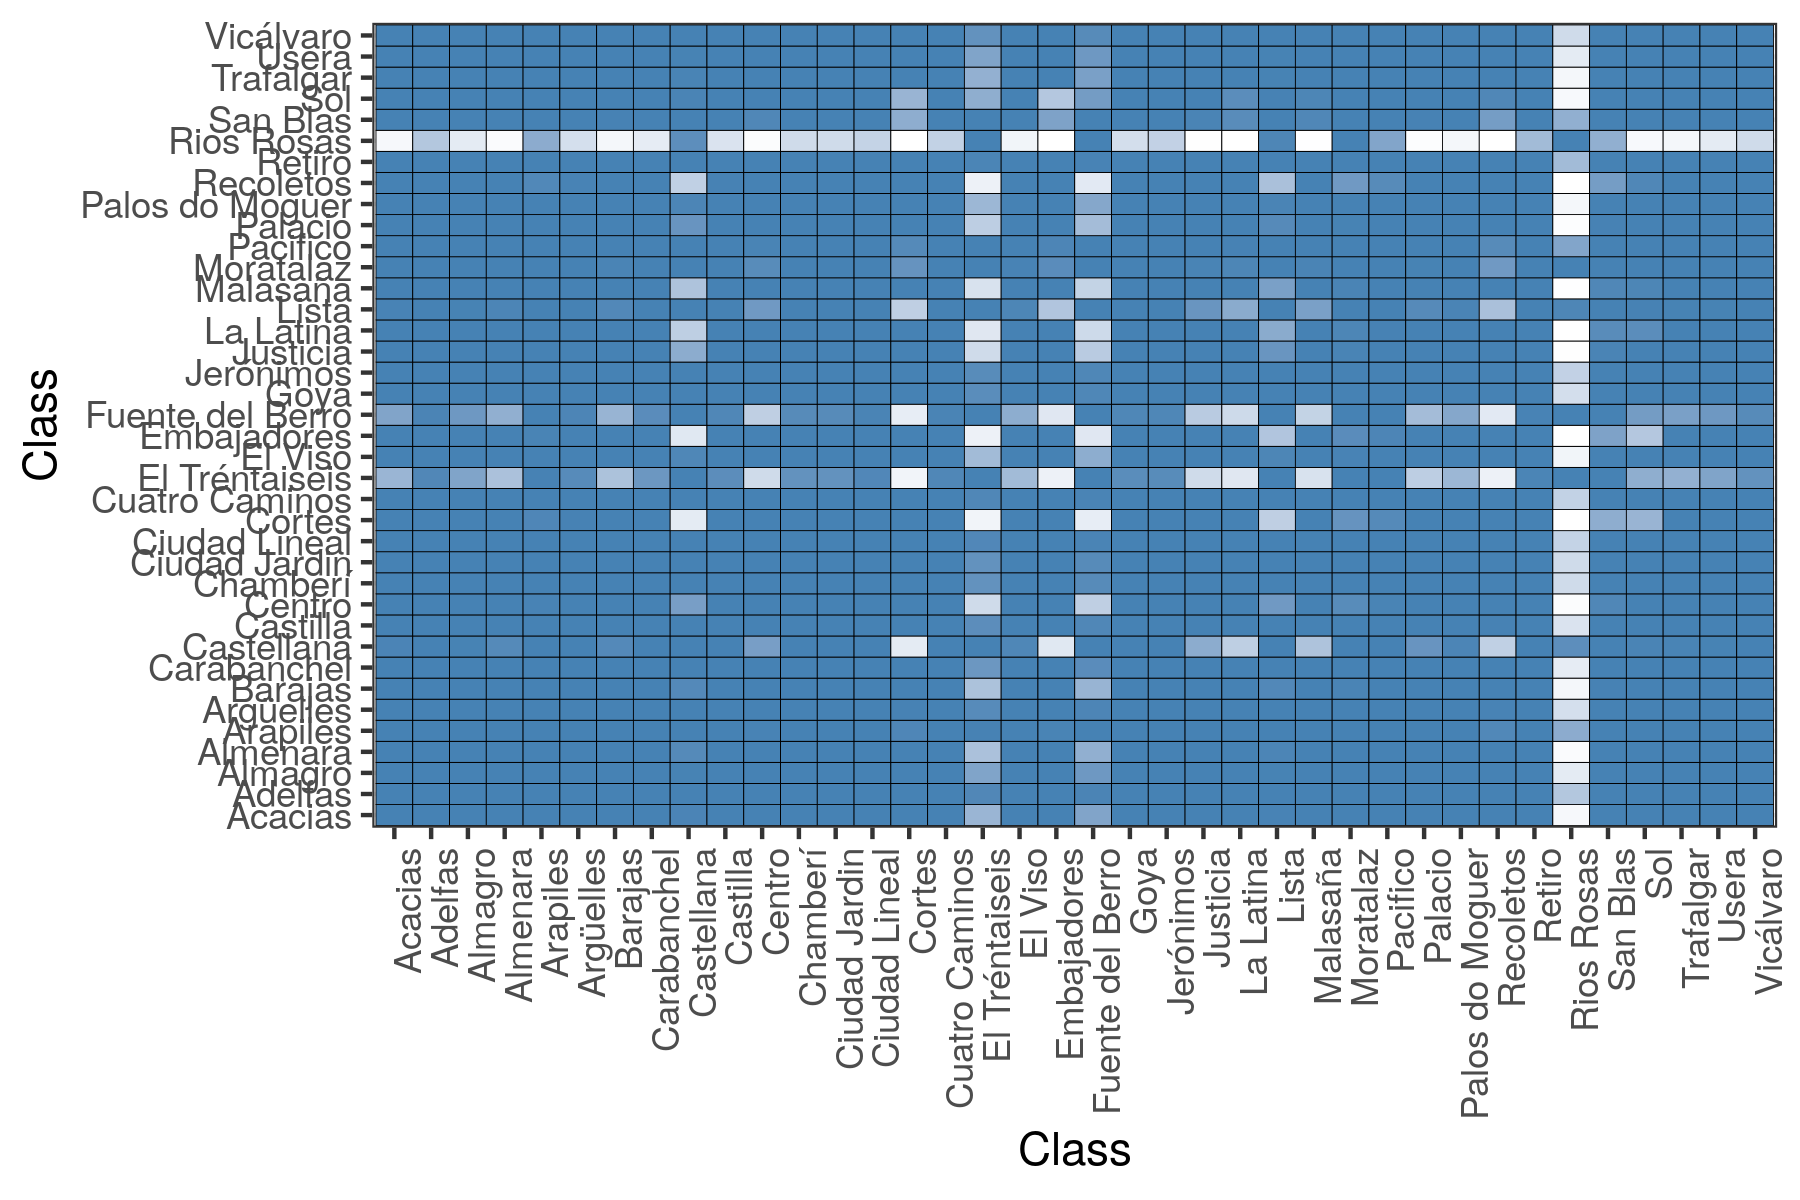

In [10]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid_clean_neighbourhood ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid_clean_neighbourhood$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [11]:
library(dendextend)


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




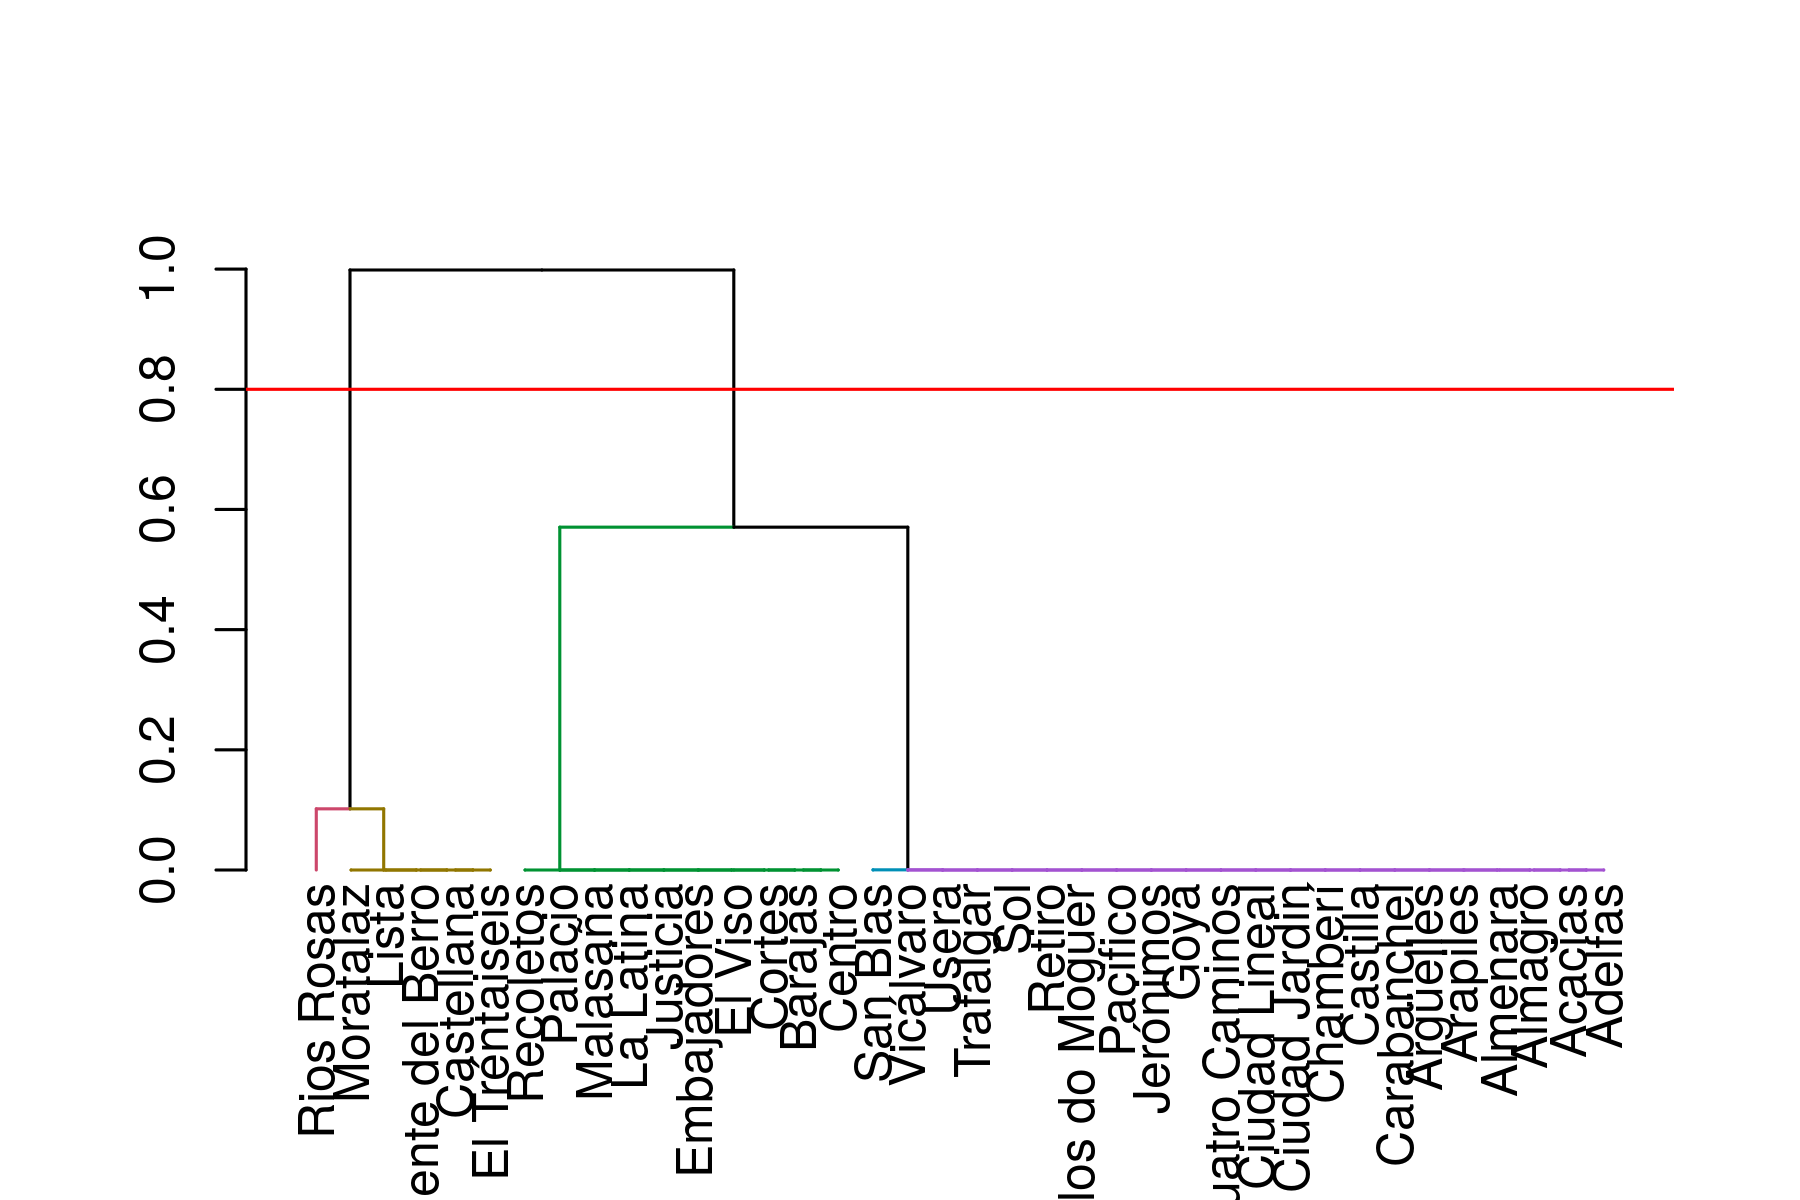

In [12]:
distancia <- as.dist(1-resm)
hc <- hclust(distancia ,method="complete")
hcd <- as.dendrogram(hc)

plot(color_branches(hcd, k=5))
abline(h=0.8,col="red")

In [13]:
library(caret)
library(cluster)
library(tidyr)

Loading required package: lattice


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




Silhouette of 4901 units in 2 clusters from silhouette.default(x = myclust$cluster, dist = dist(df_clust)) :
 Cluster sizes and average silhouette widths:
      631      4270 
0.3476960 0.7258364 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.07408  0.63897  0.77004  0.67715  0.80171  0.82483 

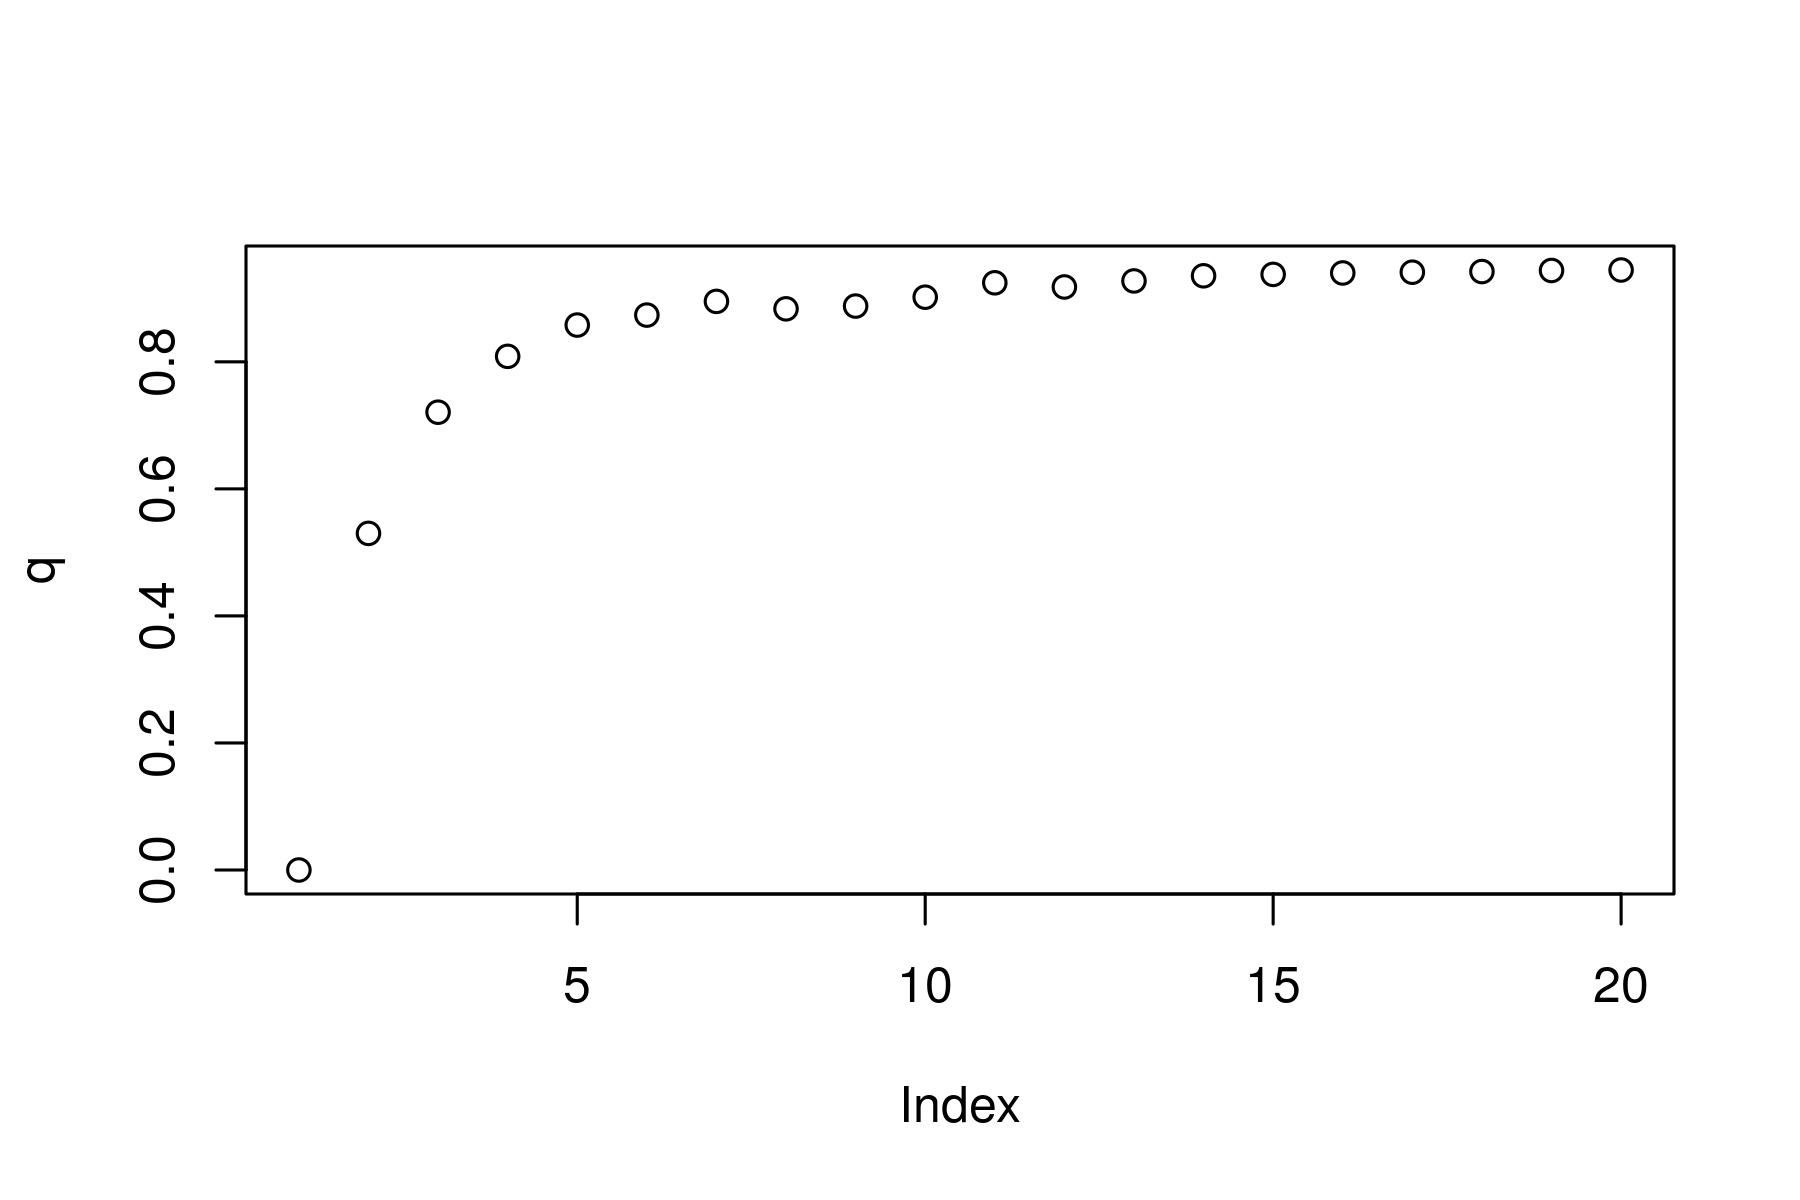

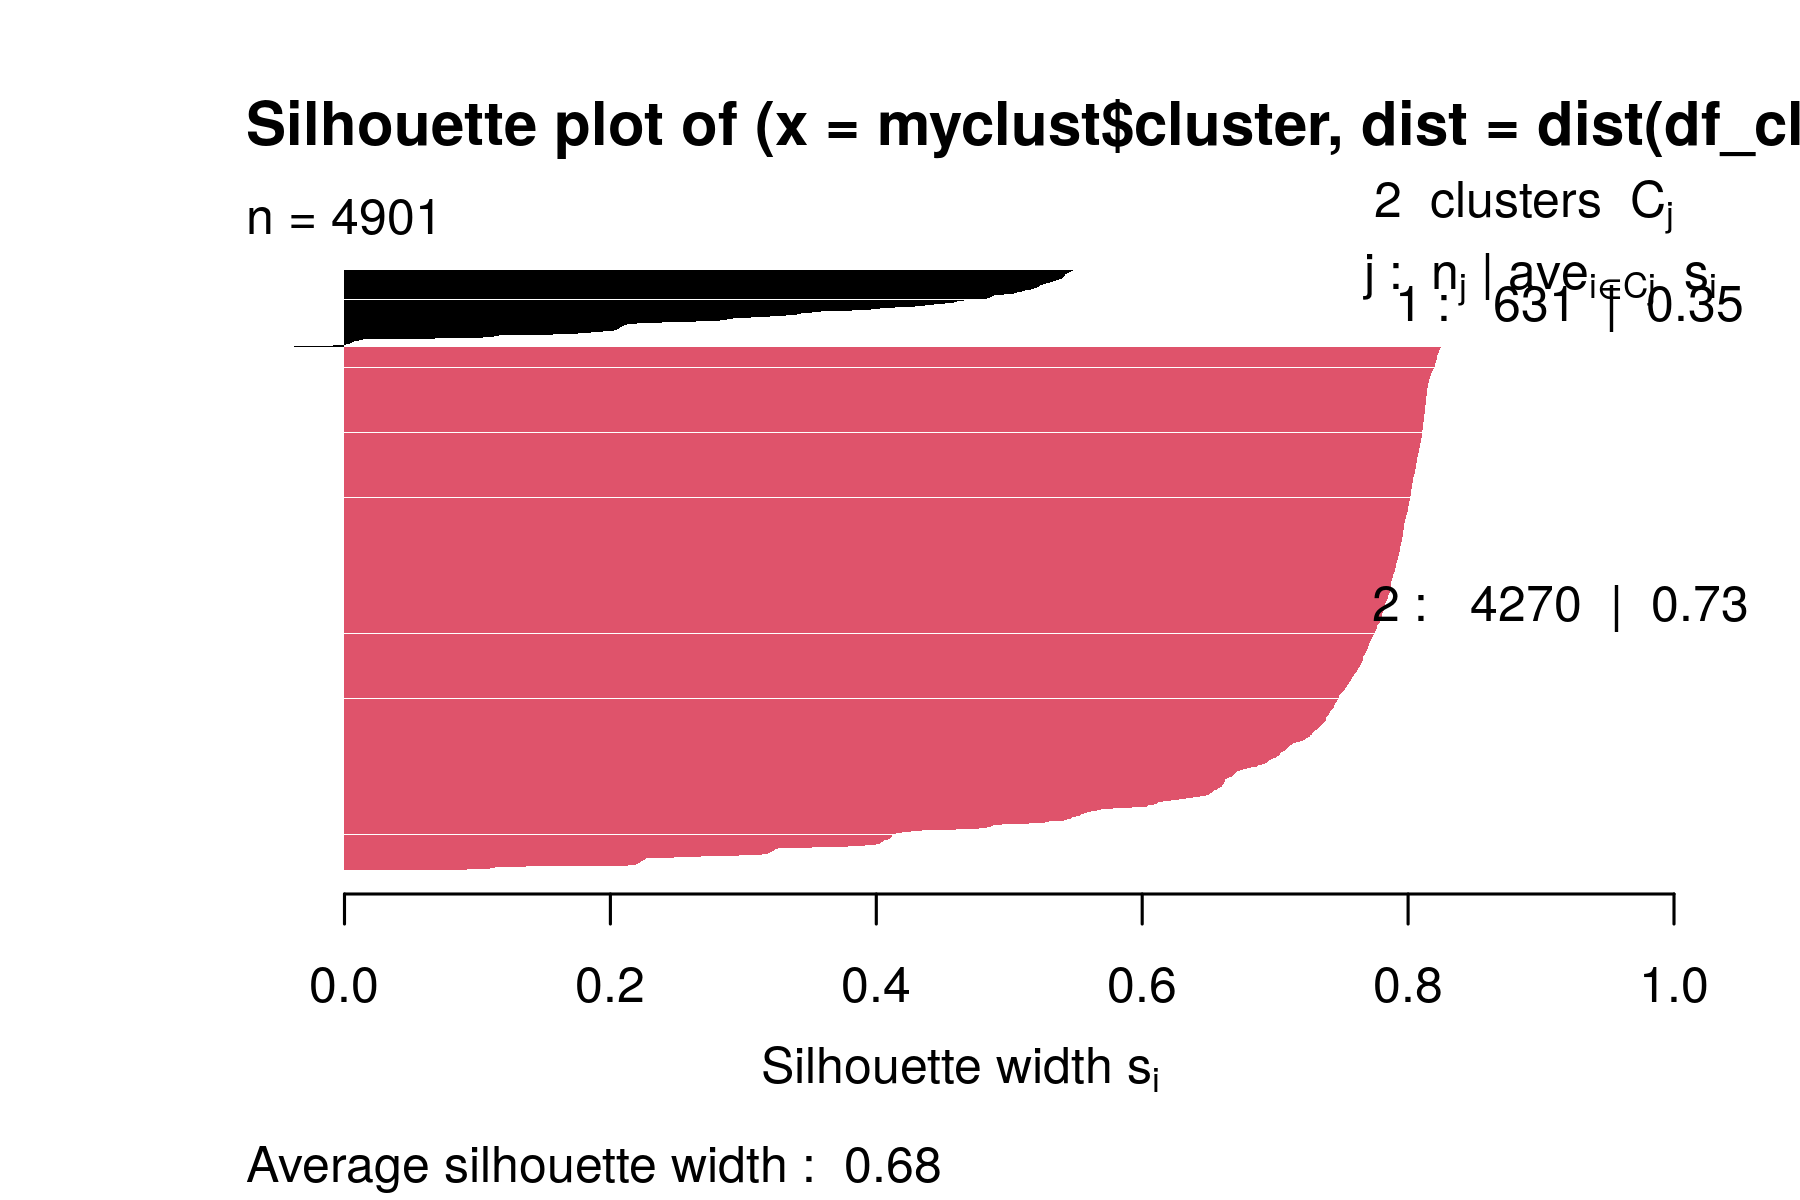

In [14]:
# Se quita la columna del barrio y Square.feet
df_clust<-df_madrid_clean_neighbourhood[,c(2,3,4,5,6,8,9,10,11,12)]

# Como no existe nmuchos datos se decide reemplazar NA con la media para calcular el numero de cluster apropiados
for (i in 1:ncol(df_clust)) {
   mn<-mean(df_clust[,i], na.rm=T)
   df_clust[is.na(df_clust[,i]), i] <-mn
}

# Probar con diferente numero de clusteres
q<-c()
for (k in 1:20) {
   myclust<-kmeans(df_clust, k)
   q[k]<-myclust$betweens/myclust$totss
}
plot(q)
qsil<-c()

k<-2
myclust<-kmeans(df_clust,k)
ss<-silhouette(myclust$cluster, dist(df_clust))  
summary(ss)
plot(ss,col=1:k,border=NA)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [15]:
paste("El punto de corte elegido es 0.8")
paste("Aparecen 2 clusters")


[1] "El punto de corte elegido es 0.8"

[1] "Aparecen 2 clusters"

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [16]:
df_madrid_clean_neighbourhood$neighb_id <- myclust$cluster

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [17]:
#set.seed(12345)
idx<-sample(1:nrow(df_madrid_clean_neighbourhood),nrow(df_madrid_clean_neighbourhood)*0.7)

df_madrid.train<-df_madrid_clean_neighbourhood[idx,]
df_madrid.test <-df_madrid_clean_neighbourhood[-idx,]

model_df_madrid<-lm(Square.Meters~Bedrooms+Bathrooms+Accommodates+Price+Guests.Included+Extra.People+Review.Scores.Rating+Neighbourhood,data=df_madrid.train)
summary(model_df_madrid)

# Mejoras del modelo. Nos quedamos con las columnas mas significativas
model_df_madrid<-lm(Square.Meters~Bedrooms+Bathrooms+Price,data=df_madrid.train)
summary(model_df_madrid)


Call:
lm(formula = Square.Meters ~ Bedrooms + Bathrooms + Accommodates + 
    Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Neighbourhood, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.565  -8.953   0.000   6.334  68.428 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.30510   41.47499  -0.007 0.994152    
Bedrooms                       18.11018    4.44485   4.074 0.000121 ***
Bathrooms                       7.31170    7.11150   1.028 0.307470    
Accommodates                   -0.20944    2.26761  -0.092 0.926677    
Price                           0.09806    0.03976   2.466 0.016149 *  
Guests.Included                -2.79880    2.38258  -1.175 0.244156    
Extra.People                    0.60455    0.31352   1.928 0.057934 .  
Review.Scores.Rating            0.31876    0.39810   0.801 0.426050    
NeighbourhoodAdelfas          -14.98761   26.14064  -0.5


Call:
lm(formula = Square.Meters ~ Bedrooms + Bathrooms + Price, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.152 -11.149  -2.414   7.823  86.954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.31323    5.36750   2.853  0.00521 ** 
Bedrooms    19.43573    2.69042   7.224 8.06e-11 ***
Bathrooms   11.23728    5.09979   2.203  0.02972 *  
Price        0.08528    0.03499   2.437  0.01647 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.77 on 106 degrees of freedom
  (3320 observations deleted due to missingness)
Multiple R-squared:  0.6251,	Adjusted R-squared:  0.6145 
F-statistic: 58.92 on 3 and 106 DF,  p-value: < 2.2e-16


In [18]:
# df_madrid.train<-predict(model_df_madrid, df_madrid.train)
df_madrid.test$Square.Meters_est <- predict(model_df_madrid, df_madrid.test)

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

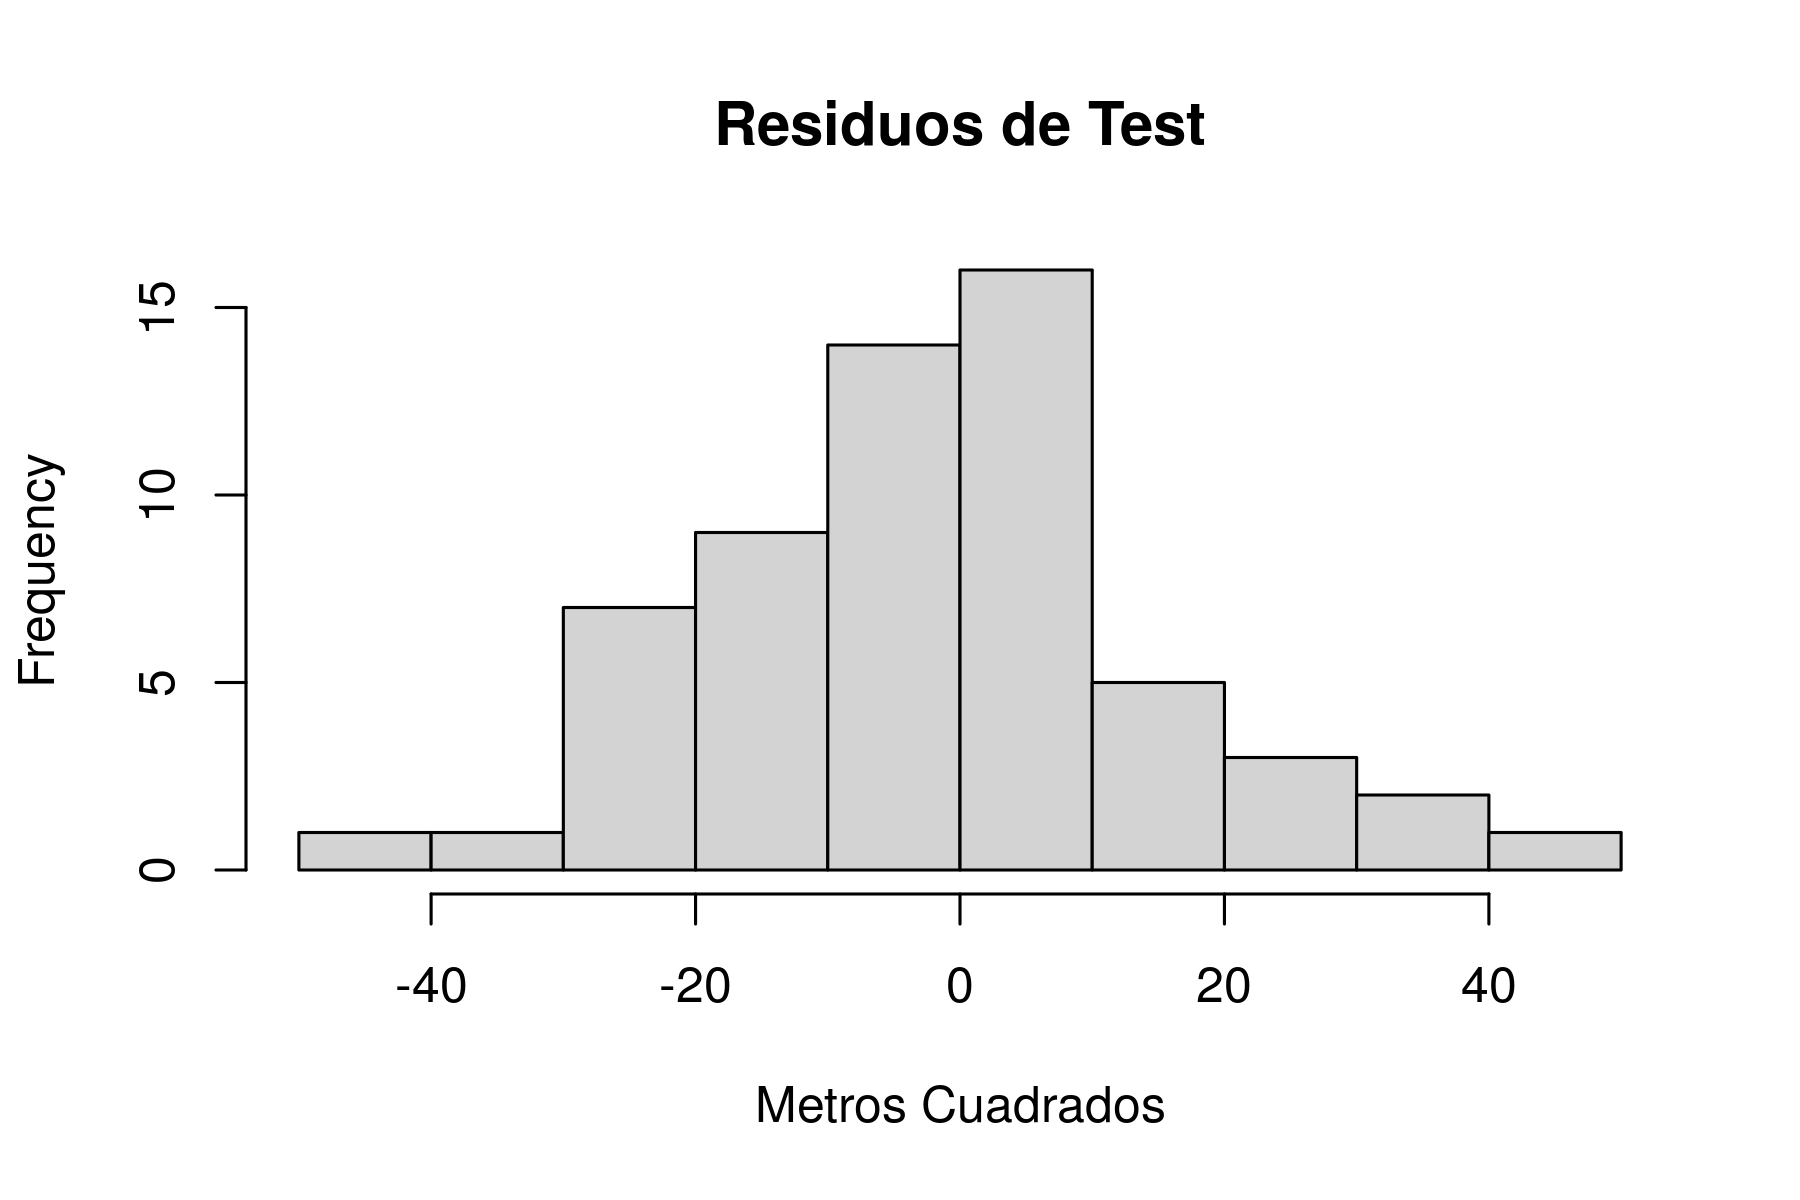

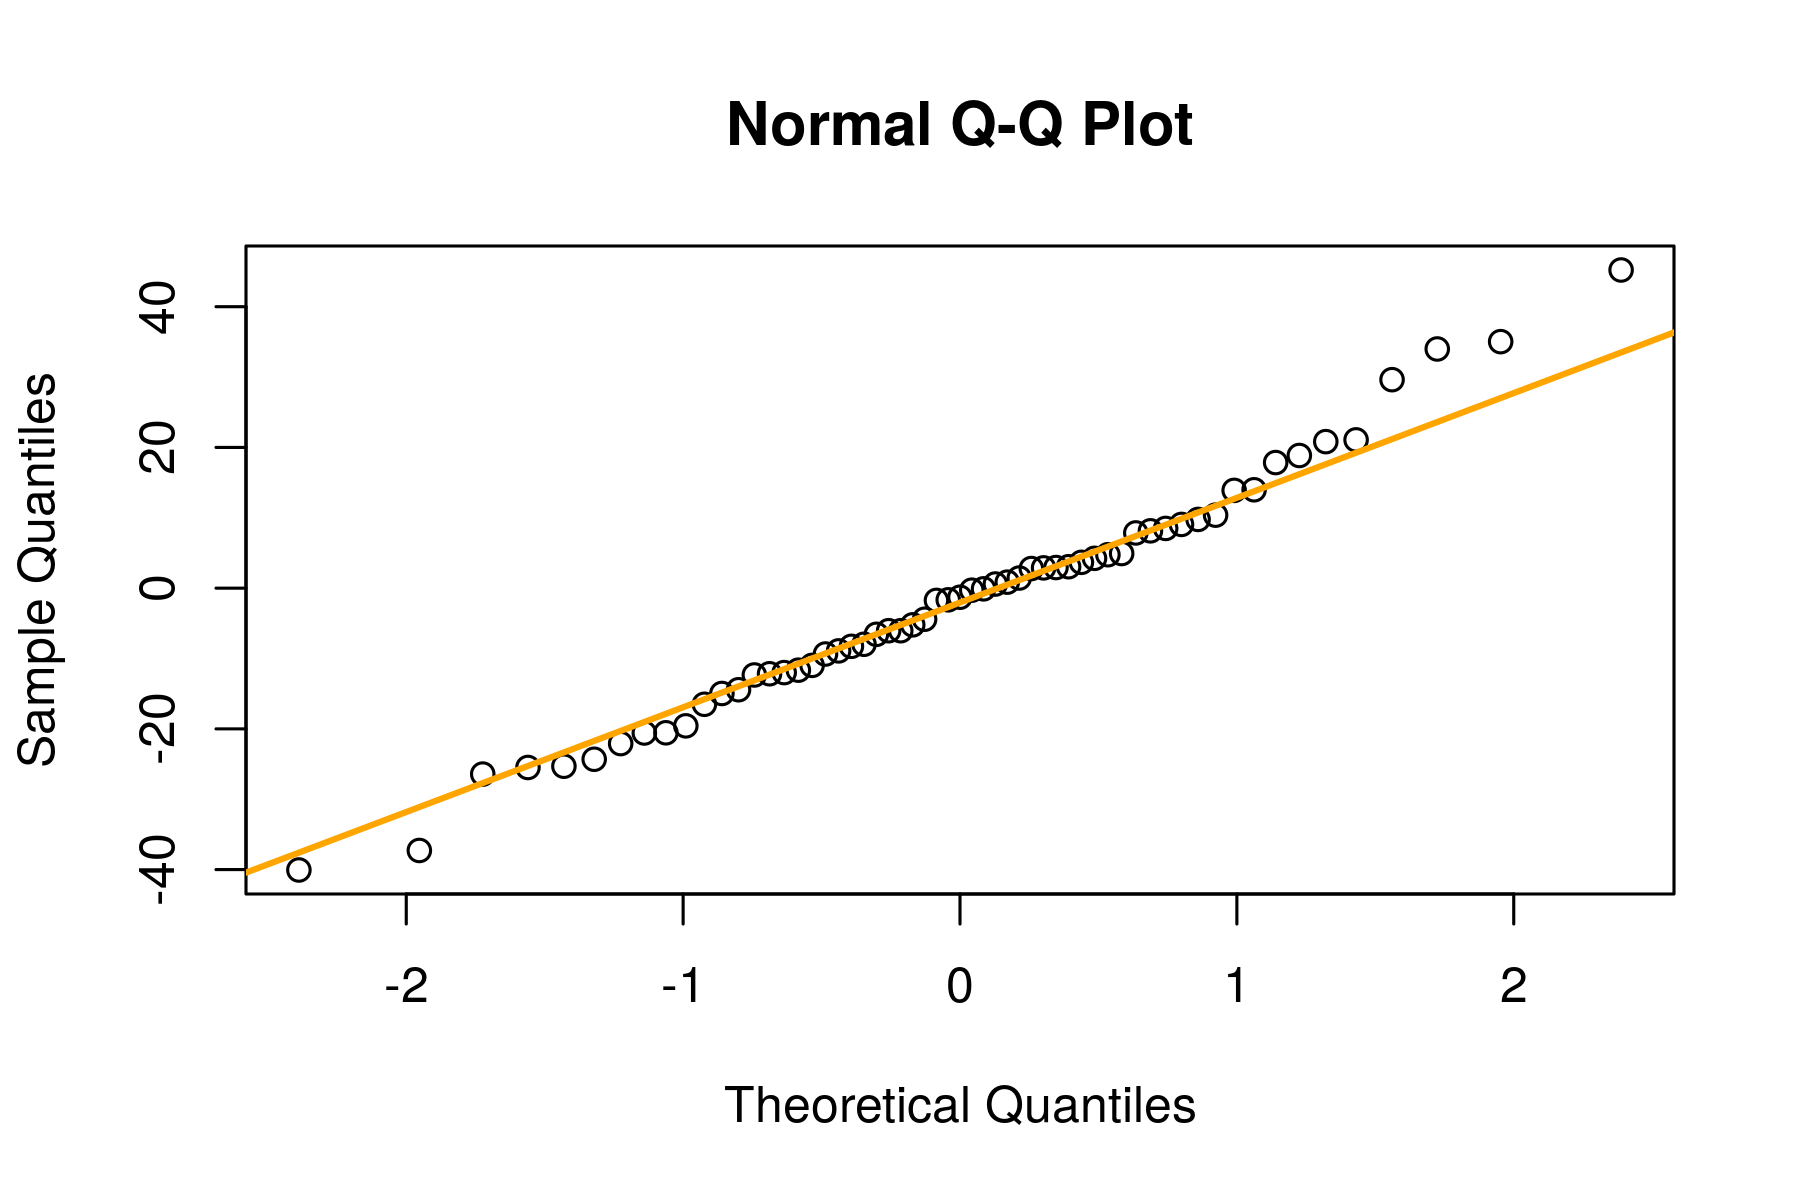

In [19]:
hist(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est, main='Residuos de Test', xlab='Metros Cuadrados')
qqnorm(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est)
qqline(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [20]:
predict(model_df_madrid,data.frame(Accommodates=6,Bathrooms=1, Bedrooms=3, Beds=5, Review.Scores.Rating=80, Price=80, Neighbourhood='Sol'))

1 
91.68026

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [21]:
df_madrid_clean_neighbourhood[is.na(df_madrid_clean_neighbourhood$Square.Meters),'Square.Meters'] <- 
    predict(model_df_madrid, df_madrid_clean_neighbourhood[is.na(df_madrid_clean_neighbourhood$Square.Meters),])

df_madrid_clean_neighbourhood

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,50.25034,2
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,73.52376,2
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,51.87070,2
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,50.84731,2
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,51.01788,2
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,106.32882,2
21,La Latina,2,1,1,1,89,NA,1,10,98,40.41007,-3.710624,53.57634,2
22,Palacio,5,3,3,3,192,NA,2,12,80,40.42017,-3.712629,123.70640,1
23,La Latina,4,1,1,1,100,NA,2,12,NA,40.40990,-3.710948,54.51444,2


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [102]:
# Quedarse con los valores indicados y eliminar los NA.
df_pca_madrid<-df_madrid_clean_neighbourhood[,c('Accommodates','Bathrooms','Bedrooms','Beds','Price'
                                                , 'Guests.Included','Extra.People','Review.Scores.Rating'
                                                , 'Latitude', 'Longitude', 'Square.Meters')] %>% drop_na()

paste("Numero de apartamentos totales: ", nrow(df_pca_madrid))

[1] "Numero de apartamentos totales:  4187"

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Accommodates,0.39988515,0.06540171,0.002775581,0.142706977,0.16999535,0.21679061,0.16575792,0.25522574,0.187057263,-0.782263096,0.001754238
Bathrooms,0.35559866,-0.07041343,-0.150450511,-0.161271810,-0.27033395,-0.29645583,-0.25095855,-0.30619749,0.686002261,0.015595659,-0.177205132
Bedrooms,0.40109884,-0.01478474,-0.130086142,-0.001010195,0.13932535,0.02202153,0.28740369,-0.45223870,-0.421162357,0.050877630,-0.578786851
Beds,0.38332364,0.04156495,-0.061476186,0.090000132,0.23362000,0.20498385,0.33318280,0.42505238,0.295330359,0.603134047,0.013722671
Price,0.34572498,-0.02890014,-0.130343539,-0.168033374,-0.40922354,-0.25241887,-0.30186737,0.57013907,-0.411258912,0.007727030,-0.133637969
Guests.Included,0.29015243,0.10012470,0.389692482,0.197303994,0.21083295,0.37397630,-0.69873342,-0.13587573,-0.081398155,0.131686530,0.005577053
Extra.People,0.13302956,0.14218634,0.786341869,0.212320836,-0.27453153,-0.35778273,0.30710182,-0.01985726,0.007263005,0.022925662,-0.003505711
Review.Scores.Rating,0.03295381,0.11577214,0.318387703,-0.908989875,0.12540402,0.18583395,0.07709418,0.01566545,0.016219702,-0.034096567,-0.001593750
Latitude,0.01807151,-0.69298848,0.136832019,0.010324715,-0.46881257,0.51181816,0.12871773,-0.04451726,0.014163914,0.009758614,-0.004673831
Longitude,0.03764959,-0.68037043,0.164540403,-0.045161422,0.54744556,-0.43017640,-0.09315782,0.10762407,-0.018732055,-0.034640938,0.002215888


[1] 2.2237551 1.1760264 1.0367126 1.0038286 0.8223209 0.7725881 0.7054487
 [8] 0.5805436 0.5683113 0.3798023 0.1200410

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Price,0.34572498,-0.02890014,-0.1303435,-0.16803337,-0.4092235,-0.2524189,-0.30186737,0.57013907,-0.411258912,0.007727030,-0.133637969
Guests.Included,0.29015243,0.10012470,0.3896925,0.19730399,0.2108330,0.3739763,-0.69873342,-0.13587573,-0.081398155,0.131686530,0.005577053
Review.Scores.Rating,0.03295381,0.11577214,0.3183877,-0.90898988,0.1254040,0.1858339,0.07709418,0.01566545,0.016219702,-0.034096567,-0.001593750
Latitude,0.01807151,-0.69298848,0.1368320,0.01032471,-0.4688126,0.5118182,0.12871773,-0.04451726,0.014163914,0.009758614,-0.004673831
Extra.People,0.13302956,0.14218634,0.7863419,0.21232084,-0.2745315,-0.3577827,0.30710182,-0.01985726,0.007263005,0.022925662,-0.003505711


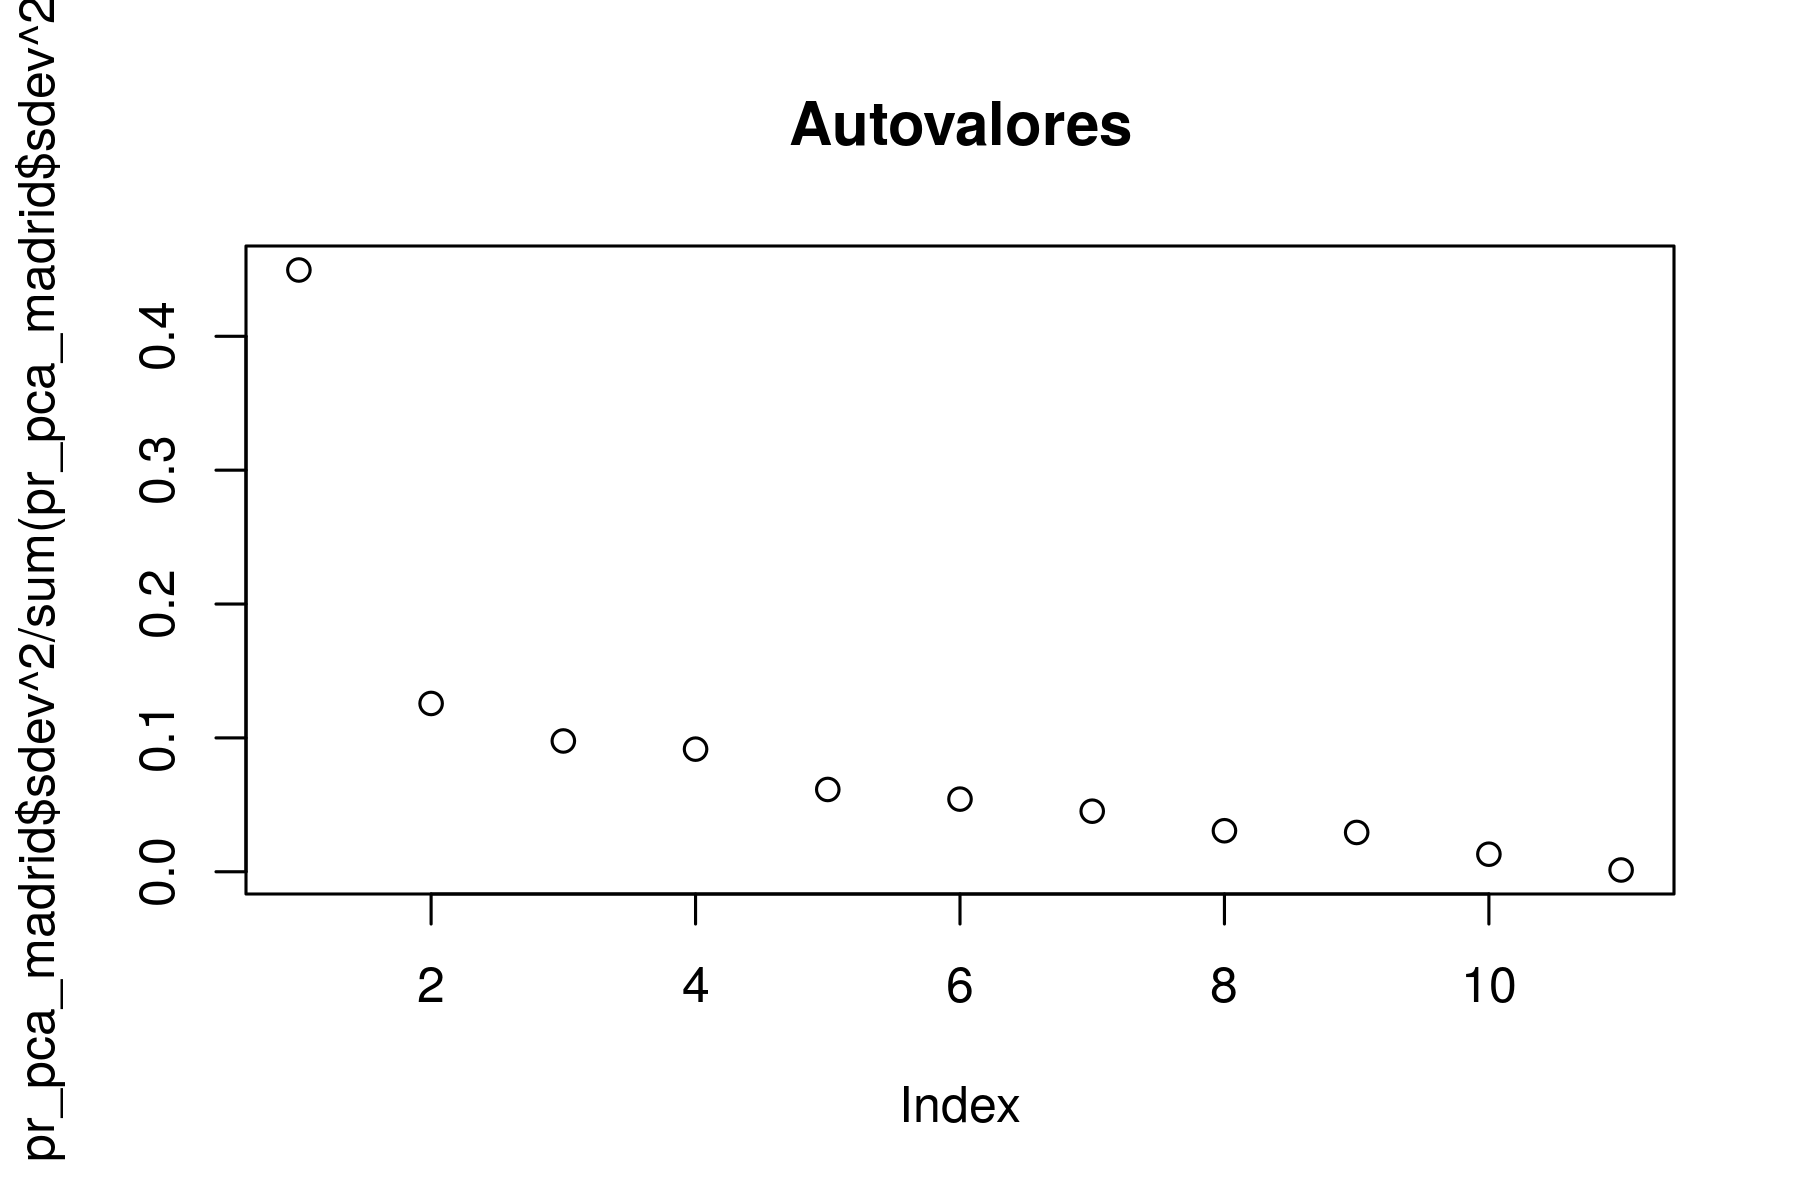

In [103]:
# Normalizacion, M. Rotacion, Autovectores, Autovalorescontr
pr_pca_madrid<-prcomp(df_pca_madrid, center=TRUE, scale.=TRUE)

# Matriz de rotación. Train
pr_pca_madrid$rotation

# Matriz de autovalore. Train
pr_pca_madrid$sdev

# Matriz de autovectores. Train
pr_pca_madrid$rotation[sample(1:nrow(pr_pca_madrid$rotation),5),]

# Ver gráfica pa elgir con cuantos nos quedamos
plot(pr_pca_madrid$sdev^2/sum(pr_pca_madrid$sdev^2),main="Autovalores")

In [83]:
paste("Nos quedamos 2 ya que contienen casi toda la información que nos interesa")

[1] "Nos quedamos 2 ya que contienen casi toda la información que nos interesa"

In [139]:
num_of_pca_componentes<-2
original_apt<-data.frame(Accommodates=3, Bathrooms=2, Bedrooms=3, Beds=3, Price=80, Guests.Included=1, Extra.People=10
                        , Review.Scores.Rating=90, Latitude=40.42, Longitude=-3.70, Square.Meters=80)

# tranformada
original_apt_tr<-predict(pr_pca_madrid, original_apt)
original_apt_tr[,1:num_of_pca_componentes]

PC1        PC2 
 1.1101198 -0.3245008

In [137]:
Apc<-pr_pca_madrid$x[,1:num_of_pca_componentes]
dim(Apc)

[1] 4187    2

In [138]:
dist<-rep(NA, nrow(Apc))
for (i in 1:nrow(Apc)){
    dist[i]<-sum((original_apt_tr[,1:2]-Apc[i,])^2)
}

# Buscar el índice menor
which.min(dist)

# Los 5 mas parecidos
five_apt_similar <- df_pca_madrid[head(order(dist),5),]
five_apt_similar

[1] 1152

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1152,4,2,2,2,80,2,25,96,40.42633,-3.698505,83.48181
1918,5,1,2,3,80,4,15,87,40.42871,-3.700586,72.24453
1575,6,1,3,4,91,1,0,96,40.40668,-3.678839,74.97272
3368,4,1,2,3,120,4,0,97,40.43123,-3.704882,75.65581
80,5,2,2,2,100,1,0,94,40.41463,-3.691347,85.18745


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?